In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv("car_price.csv")
df.head()

,CarName,carbody,drivewheel,enginelocation,fueltype,aspiration,doornumber,cylindernumber,enginetype,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,convertible,rwd,front,gas,std,two,four,dohc,mpfi,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,hatchback,rwd,front,gas,std,two,six,ohcv,mpfi,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,sedan,fwd,front,gas,std,four,four,ohc,mpfi,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,sedan,4wd,front,gas,std,four,five,ohc,mpfi,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.828571,98.947143,174.354286,65.935714,53.768571,2565.909524,127.266667,3.333905,3.258286,10.224381,104.000000,5110.476190,25.180952,30.695238,13289.665081
std,1.244757,6.172319,12.457557,2.141794,2.489242,522.279331,41.297095,0.270150,0.311277,4.068746,39.114725,484.530811,6.487059,6.835908,7918.471818
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,3.150000,3.110000,8.525000,70.000000,4800.000000,19.000000,25.000000,7823.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2422.500000,120.000000,3.320000,3.290000,9.000000,95.000000,5100.000000,24.000000,30.000000,10470.000000
75%,2.000000,102.400000,183.500000,66.900000,55.575000,2953.500000,145.750000,3.587500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16502.250000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<Figure size 640x480 with 0 Axes>

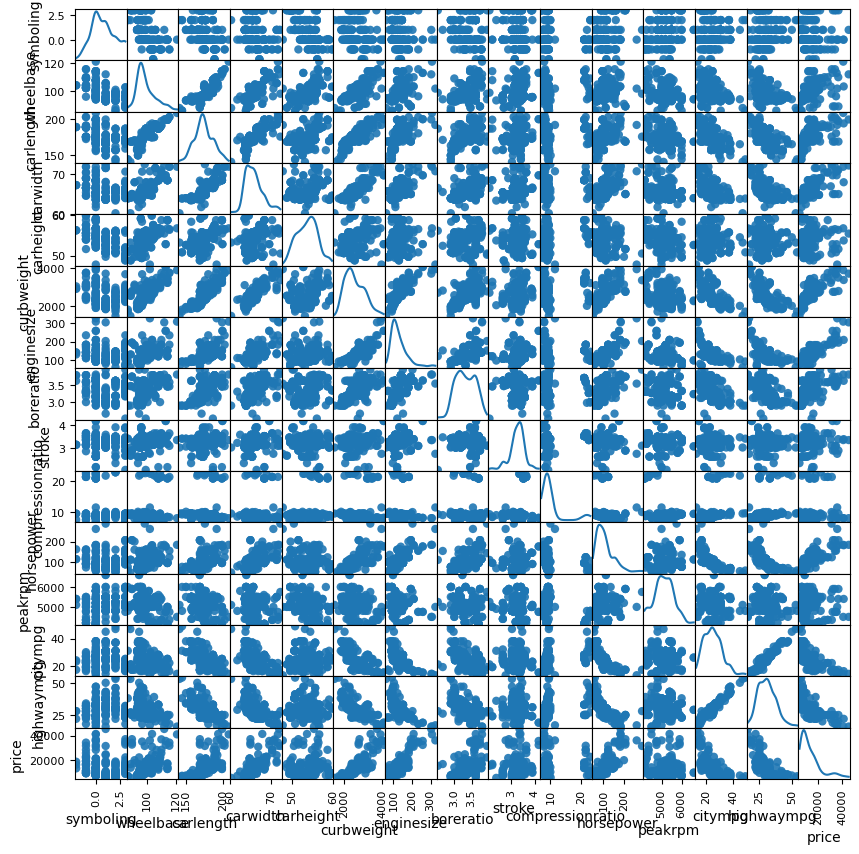

In [4]:
fig=plt.figure()
scatter_matrix(df,figsize=(10,10),alpha=0.9,diagonal="kde",marker="o")
plt.show()

C:\Users\cirik\AppData\Local\Temp\ipykernel_19704\3653468819.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hcorr=df.corr(method="pearson")


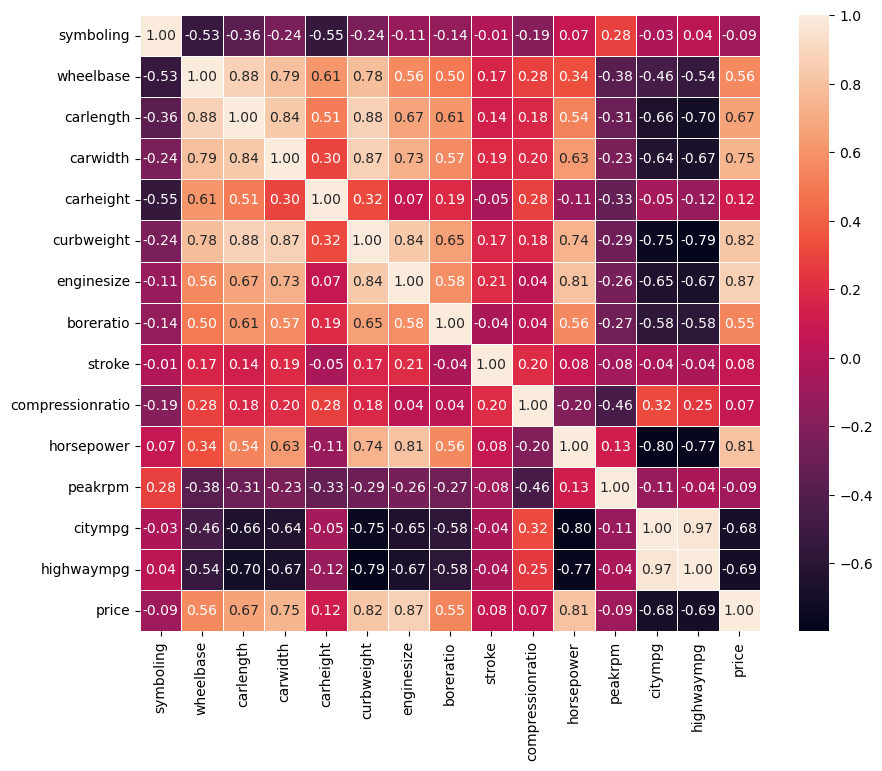

In [5]:
hcorr=df.corr(method="pearson")
plt.figure(figsize=(10,8), dpi =100)
sns.heatmap(hcorr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

In [6]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
205     True
206     True
207     True
208     True
209     True
Length: 210, dtype: bool

In [7]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    object 
 1   carbody           205 non-null    object 
 2   drivewheel        205 non-null    object 
 3   enginelocation    205 non-null    object 
 4   fueltype          205 non-null    object 
 5   aspiration        205 non-null    object 
 6   doornumber        205 non-null    object 
 7   cylindernumber    205 non-null    object 
 8   enginetype        205 non-null    object 
 9   fuelsystem        205 non-null    object 
 10  symboling         205 non-null    int64  
 11  wheelbase         205 non-null    float64
 12  carlength         205 non-null    float64
 13  carwidth          205 non-null    float64
 14  carheight         205 non-null    float64
 15  curbweight        205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [8]:
import random
l=list(range(0,205))
df["Model"]=l

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    object 
 1   carbody           205 non-null    object 
 2   drivewheel        205 non-null    object 
 3   enginelocation    205 non-null    object 
 4   fueltype          205 non-null    object 
 5   aspiration        205 non-null    object 
 6   doornumber        205 non-null    object 
 7   cylindernumber    205 non-null    object 
 8   enginetype        205 non-null    object 
 9   fuelsystem        205 non-null    object 
 10  symboling         205 non-null    int64  
 11  wheelbase         205 non-null    float64
 12  carlength         205 non-null    float64
 13  carwidth          205 non-null    float64
 14  carheight         205 non-null    float64
 15  curbweight        205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [10]:
print(df.fueltype.value_counts())
print(df.fuelsystem.value_counts())
print(df.carbody.value_counts())
print(df.doornumber.value_counts())
print(df.cylindernumber.value_counts())

drop_t=["aspiration","drivewheel","enginetype","enginelocation"]
df=df.drop(drop_t,axis=1)


gas       185
diesel     20
Name: fueltype, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


In [11]:
df.replace({'fueltype':{'gas':1,'diesel':2}},inplace=True)
df.replace({'fuelsystem':{'mpfi':1,'2bbl':2,'idi':3,'1bbl':4,'spdi':5,'4bbl':6,'mfi':7,'spfi':8}},inplace=True)
df.replace({'carbody':{'sedan':1,'hatchback':2,'wagon':3,'hardtop':4,'convertible':5}},inplace=True)
df.replace({'doornumber':{'four':4,'two':2}},inplace=True)
df.replace({'cylindernumber':{'four':4,'three':3,'two':2,'five':5,'six':6,'twelve':12,'eight':8}},inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    object 
 1   carbody           205 non-null    int64  
 2   fueltype          205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   cylindernumber    205 non-null    int64  
 5   fuelsystem        205 non-null    int64  
 6   symboling         205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginesize        205 non-null    int64  
 13  boreratio         205 non-null    float64
 14  stroke            205 non-null    float64
 15  compressionratio  205 non-null    float64
 16  horsepower        205 non-null    int64  
 1

In [13]:
car_list=df[['CarName',"Model"]]

car_price=df['price']
car_detail=df.drop(["CarName","price"],axis=1)
print("ALL price",car_price.head(5))
print("ALL CAR",car_detail.head(5))

ALL price 0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64
ALL CAR    carbody  fueltype  doornumber  cylindernumber  fuelsystem  symboling  \
0        5         1           2               4           1          3   
1        5         1           2               4           1          3   
2        2         1           2               6           1          1   
3        1         1           4               4           1          2   
4        1         1           4               5           1          2   

   wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   bo

In [14]:
x_train,x_test,y_train,y_test=train_test_split(car_detail,car_price,test_size=0.2,random_state=42)
print("x train:",x_train,"\nx test: ",x_test,"\ny train: ",y_train,"\ny test: ",y_test)

x train:      carbody  fueltype  doornumber  cylindernumber  fuelsystem  symboling  \
66         1         2           4               4           3          0   
111        1         1           4               4           1          0   
153        3         1           4               4           2          0   
96         1         1           4               4           2          1   
38         2         1           2               4           4          0   
..       ...       ...         ...             ...         ...        ...   
106        2         1           2               6           1          1   
14         1         1           4               6           1          1   
92         1         1           4               4           2          1   
179        2         1           2               6           1          3   
102        3         1           4               6           1          0   

     wheelbase  carlength  carwidth  carheight  curbweight  engine

In [15]:
 independent_scaler=StandardScaler()
x_train=independent_scaler.fit_transform(x_train)
x_test=independent_scaler.transform(x_test)
print(x_train[0:5,:]) 
 print("test data\n",x_test[0:5,:])

[[-0.80817099  3.15171911  0.91798509 -0.35247935  0.79363038 -0.72738032
   1.03708546  0.07244984  0.08381686  0.27677891  0.28128677  0.18801047
   0.4058361   1.21510088  3.09986047 -0.81538553 -1.91782869  0.96431609
   1.3135007  -0.58343487]
 [-0.80817099 -0.31728716  0.91798509 -0.35247935 -0.73760941 -0.72738032
   1.54123134  1.04391556  1.17026768  1.20726917  1.01604452 -0.15899277
   0.51738434 -3.36016616 -0.43959084 -0.24189416 -0.292907   -0.98812636
  -1.02456857  0.1695818 ]
 [ 1.18491235 -0.31728716  0.91798509 -0.35247935  0.02801048 -0.72738032
  -0.50896191 -0.36761583 -1.09710795  2.17821552 -0.54164191 -0.85299925
  -1.00710835 -0.70966663 -0.28343858 -1.0647296  -0.69913742  0.96431609
   1.00175813  0.87239737]
 [-0.80817099 -0.31728716  0.91798509 -0.35247935  0.02801048  0.07863571
  -0.71062026 -0.73295337 -1.00263396  0.31723501 -1.14708229 -0.72906952
  -0.63528086  0.11072608 -0.17933707 -0.89018875  0.11332343  0.96431609
   1.00175813 -0.08142375]
 [ 0

In [16]:
ln=LinearRegression()#create object of linear regression
ln.fit(x_train,y_train)
print("intercept is",str(ln.intercept_))
print("coefficient is",str(ln.coef_))
x=120000
prediction=ln.predict(x_test)
prediction

intercept is 13223.414634146344
coefficient is [  319.70480566  -901.18181426   597.34747104 -1804.78921959
  -316.0339213    253.76620943   810.91733354 -1224.86874415
  1340.74269245   480.59983554  -156.80771375  6360.44097456
  -576.41079636 -1281.80546539  2385.10086134  1799.45151094
  1004.80062841 -1848.28089986   838.34189656  -875.37023661]


array([28550.79305383, 17219.28943588, 10681.77033898, 13624.53863543,
       26649.58218343,  5409.08646652,  9268.12050043,  6058.15955153,
       11812.9893174 ,  7975.06455035, 14149.40323635,  4332.71371436,
       18011.28806661,  8730.02342895, 41351.74428741,  5978.73711052,
          47.49382513, 14930.08642479, 10403.70263656, 11182.2604679 ,
       11196.00059741, 22326.67512716,  6620.23648374,  1678.53398775,
        7760.0476328 , 27047.27779727, 13896.89233802, 16803.2524854 ,
        6465.75140279, 15760.8846973 , 25671.48360638,  6693.82841179,
        6173.51615325, 22275.00345997,  7211.59447858, 25194.59157389,
       10772.32741667,  9783.94331511,  6598.92317586, 14850.78402497,
        9510.09820404])

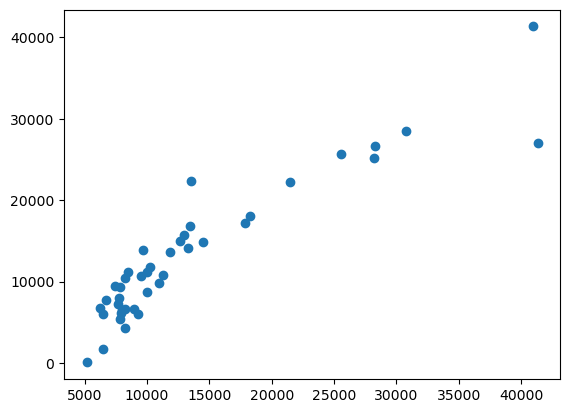

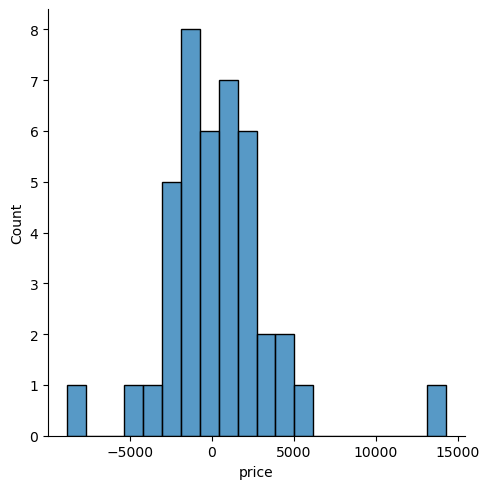

final score: 0.8552153759566106
[28550.79305383 17219.28943588 10681.77033898 13624.53863543
 26649.58218343  5409.08646652  9268.12050043  6058.15955153
 11812.9893174   7975.06455035 14149.40323635  4332.71371436
 18011.28806661  8730.02342895 41351.74428741  5978.73711052
    47.49382513 14930.08642479 10403.70263656 11182.2604679
 11196.00059741 22326.67512716  6620.23648374  1678.53398775
  7760.0476328  27047.27779727 13896.89233802 16803.2524854
  6465.75140279 15760.8846973  25671.48360638  6693.82841179
  6173.51615325 22275.00345997  7211.59447858 25194.59157389
 10772.32741667  9783.94331511  6598.92317586 14850.78402497
  9510.09820404]


In [17]:
plt.scatter(y_test,prediction)
sns.displot((y_test-prediction),bins=20)
plt.show()
print("final score:",ln.score(x_test,y_test))
print(prediction)

In [18]:
car_detail.head()

,carbody,fueltype,doornumber,cylindernumber,fuelsystem,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Model
0,5,1,2,4,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0
1,5,1,2,4,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,1
2,2,1,2,6,1,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,2
3,1,1,4,4,1,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,3
4,1,1,4,5,1,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,4


new_input = np.array([[2,2,4,4,1,3,87,170,65,48,2337,109,3.19,2.65,8.0,140,5000,20,26,2]])

In [19]:
new_input = np.array([[2,2,4,4,1,3,87,170,65,48,2337,109,3.19,2.45,8.0,140,4000,20,26,2]])
p=ln.predict(new_input)

In [20]:
p

array([4575351.4752258])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    object 
 1   carbody           205 non-null    int64  
 2   fueltype          205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   cylindernumber    205 non-null    int64  
 5   fuelsystem        205 non-null    int64  
 6   symboling         205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginesize        205 non-null    int64  
 13  boreratio         205 non-null    float64
 14  stroke            205 non-null    float64
 15  compressionratio  205 non-null    float64
 16  horsepower        205 non-null    int64  
 1